In [1]:
# generic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# notebook settings
%config IPCompleter.greedy=True
%load_ext autoreload
%autoreload 2 
# precision and plot settings
num_precision = 3
np.set_printoptions(precision=num_precision, suppress=True)
pd.set_option('display.float_format', lambda x: f'{x:,.{num_precision}f}')
pd.set_option("display.precision", num_precision)
pd.set_option('display.max_columns', None)
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['lines.linewidth'] = 2

In [429]:
import sys, os
from skimage import io
import shutil

In [4]:
# will try to sort images based on pixel variation or sobel filters
directory = '../data/sat_images/test_filtering/'

In [64]:
for file in os.listdir(directory):
    if file.endswith(".png"):
        filename = os.path.join(directory, file)
        image = io.imread(filename)
#         print(filename)
#         print(image.shape)
#         io.imshow(image)
#         plt.show()
        pixel_range = []
        for channel in range(3):
#             print(image[:,:,channel].std())
            pixel_range.append(image[:,:,channel].std())
#         print(np.mean(pixel_range))
        mean_range = np.mean(pixel_range)
        if mean_range < 10:
            print(f'excluding: {file}')

excluding: satimg_AK_7627_Wild Camping_17_61.773262_-149.329892.png
excluding: satimg_CO__39_Informal Campsite_17_38.26762_-103.70542_rot90.png
excluding: satimg_AK_390_Established Campground_17_65.276088_-146.651306_rot90.png


In [12]:
filename = '../data/sat_images/test_filtering/satimg_AK_7627_Wild Camping_17_61.773262_-149.329892.png'

In [17]:
image = io.imread(filename)

/usr/local/anaconda3/envs/py377/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


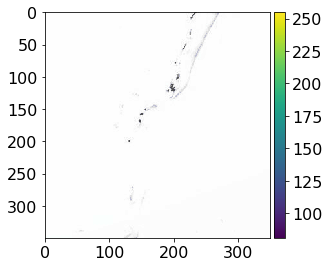

In [18]:
io.imshow(image)

In [20]:
image.shape # alpha channel is not useful here

(350, 350, 4)

In [28]:
image[:,:,0].mean()

253.0343755102041

In [27]:
image[:,:,0].std()

6.646902144624711

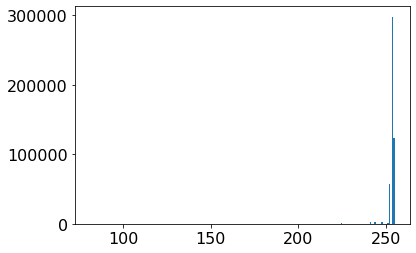

In [19]:
ax = plt.hist(image.ravel(), bins = 256)

In [196]:
exclude_dir = 'sat_images/excluded'
sobel_dir = '/Users/pault/Desktop/github/CampsitePredict/data/sat_images/sobeled'

In [157]:
# def check_imgs(directory, exclude_dir, sobel_dir):
#     counter = 0
#     sb_count = 0
#         for file in os.listdir(directory):
#             if file.endswith(".png"):
#                 filename = os.path.join(directory, file)
#                 image = io.imread(filename)
#         #         print(filename)
#         #         print(image.shape)
#         #         io.imshow(image)
#         #         plt.show()
#                 pixel_range = []
#                 for channel in range(3):
#         #             print(image[:,:,channel].std())
#                     pixel_range.append(image[:,:,channel].std())
#         #         print(np.mean(pixel_range))
#                 mean_range = np.mean(pixel_range)
#                 if mean_range < 10:
#                     print(f'excluding: {file}')
#                     # move file
#                     os.rename(filename, os.path.join(exclude_dir, file))  
#                     counter += 1
#                 else:
#                     continue
#     #                 image_sb = sobel_image(image).astype('uint8')
#     #                 sb_filename = os.path.join(sobel_dir, file)
#     #                 io.imsave(sb_filename, image_sb, check_contrast=False)
#     #                 sb_count += 1
#         print(f'{counter} files were excluded and moved.')
#         print(f'{sb_count} files were saved as sobeled.')

In [444]:
def check_imgs(directory, exclude_dir, sobel_dir):
    counter = 0
    sb_count = 0
    filedict = {}
    for root_path, dirs, files in os.walk(directory, followlinks=False):
#         for d in dirs:
#             print(os.path.relpath(os.path.join(root_path, d), "."))
        for file in files:
            if file.endswith(".png"):
#                 print(os.path.relpath(os.path.join(root_path, file), "."))
#                 filedict.append(file: os.path.join(root_path, file))
#                 print(os.path.join(root_path, file))
                filedict[file] = str(os.path.join(root_path, file))
    
    # now go through files
    for file, filepath in filedict.items():
                image = io.imread(filepath)
#         #         print(filename)
# #                 print(image.shape)
#                 io.imshow(image)
#                 plt.show()
                pixel_range = []
                for channel in range(3):
        #             print(image[:,:,channel].std())
                    pixel_range.append(image[:,:,channel].std())
        #         print(np.mean(pixel_range))
#                 breakpoint()
#                 mean_range = np.mean(pixel_range)
#                 breakpoint()
                # if all channels have a small range, exclude them
                if np.all(np.array(pixel_range) < 10):
#                     pass
                    print(f'excluding: {file}')
# #                     print(dirs)
#                     print(file)
                    print(os.path.join(exclude_dir + os.sep + file)) #subdir + os.sep + file
# # #                     print(os.path.join(exclude_dir, file))
# #                     # move file
                    shutil.move(filepath, os.path.join(exclude_dir + os.sep + file)) #, symlinks=False)
#                     os.rename(filepath, os.path.join(exclude_dir + os.sep + file))  
                    counter += 1
# #                 else:
# #                     continue
# #     #                 image_sb = sobel_image(image).astype('uint8')
# #     #                 sb_filename = os.path.join(sobel_dir, file)
# #     #                 io.imsave(sb_filename, image_sb, check_contrast=False)
# #     #                 sb_count += 1
    print(f'{counter} files were excluded and moved.')
    print(f'{sb_count} files were saved as sobeled.')
    return filedict

In [437]:
# directory = '/Users/pault/Desktop/github/CampsitePredict/data/img_testing/test_filtering'
directory = '../data/img_testing/test_filtering'
exclude_dir = '../data/sat_images/excluded'
sobel_dir = '/Users/pault/Desktop/github/CampsitePredict/data/sat_images/sobeled'

In [443]:
filedict = check_imgs(directory, exclude_dir, sobel_dir)
filedict # numpy.any(a, axis=None, out=None, keepdims=<no value>

> <ipython-input-442-7db03ce6b8ca>(30)check_imgs()
     28 #                 mean_range = np.mean(pixel_range)
     29                 breakpoint()
---> 30                 if np.any(np.array(pixel_range) < 10):
     31 #                     pass
     32                     print(f'excluding: {file}')

ipdb> np.array(pixel_range)
array([52.93 , 50.893, 50.074])
ipdb> test = np.array(pixel_range)
ipdb> test
array([52.93 , 50.893, 50.074])
ipdb> np.all(test < 10)
False
ipdb> np.all(test < 51)
False
ipdb> np.all(test < 53)
True
ipdb> exit


BdbQuit: 

In [ ]:
# now test with entire test
directory = '../data/sat_images/'
filedict = check_imgs(directory, exclude_dir, sobel_dir)
# filedict

In [91]:
image = os.path.join('../data/sat_images/test_filtering/', 'satimg_CO__45_Informal Campsite_17_40.042186_-105.512594_rot90.png')

In [93]:
image = io.imread(image)

In [148]:
from scipy import ndimage
from skimage.filters import sobel
from tensorflow.image import sobel_edges
from tensorflow.math import reduce_sum
from tensorflow import sqrt

def sobel_image(image):
    '''
    
    '''
#     dx = ndimage.sobel(image, 0)  # horizontal derivative
#     dy = ndimage.sobel(image, 1)  # vertical derivative
#     mag = np.hypot(dx, dy)  # magnitude
#     mag *= 255.0 / np.max(mag)  # normalize (Q&D)
    # with skimage
    dx = sobel(image, axis=0)  # horizontal derivative
    dy = sobel(image, axis=1)  # vertical derivative
#     mag = np.hypot(dx, dy)  # magnitude
#     mag *= 765.0 / np.max(mag)  # normalize (Q&D)
#     mag = sobel(image)
    grad_components = sobel_edges(image)
    grad_mag_components = (dx, dy)**2
    grad_mag_square = reduce_sum(grad_mag_components,axis=-1) # sum all magnitude components
    grad_mag_img = sqrt(grad_mag_square)
    grad_mag_img *= 255.0 / np.max(grad_mag_img)
    return mag

ModuleNotFoundError: No module named 'tensorflow'

In [137]:
test = sobel(image, axis=0)

In [138]:
test[:,:,3].max()

0.1375

In [147]:
result = sobel_image(image)

TypeError: unsupported operand type(s) for ** or pow(): 'tuple' and 'int'

In [140]:
result.shape

(350, 350, 4)

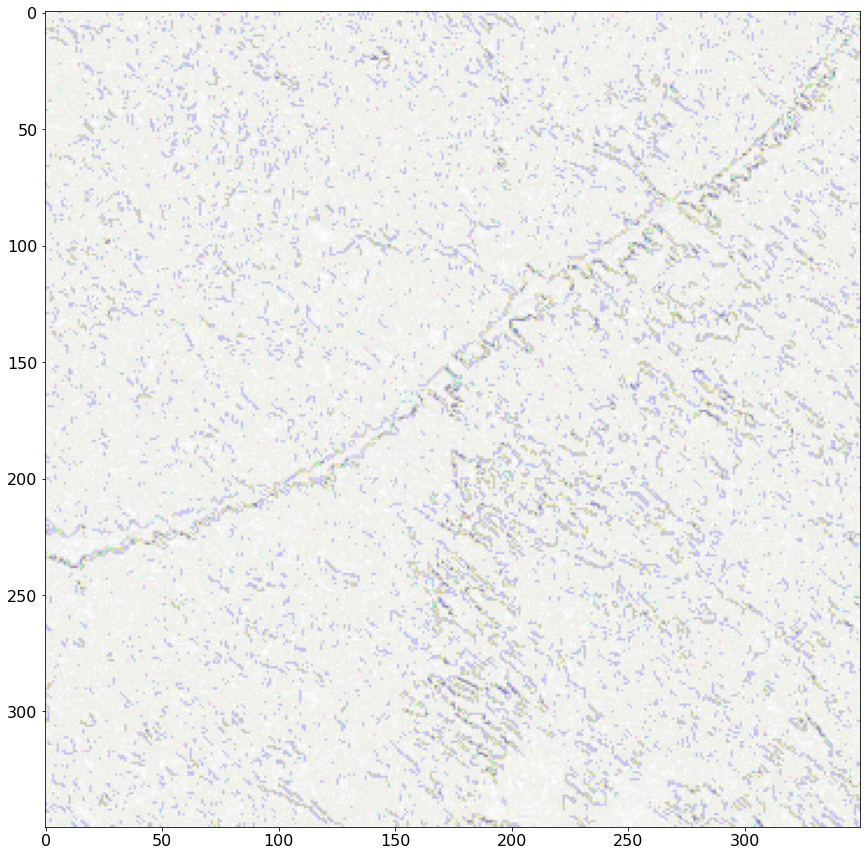

In [141]:
fig, ax = plt.subplots(1, figsize=(15,15))
plt.imshow(result.astype('uint8'), cmap='Greys')
# io.imshow(result) #, cmap='Greys')